In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import math

c:\Users\kwitv\Documents\MARC\SOCprediction\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = TabularDataset(f'Data/phil_rangedata_train.csv')
train_data.head()

,Initial SOC,Final SOC,Altitude Difference,Average Speed,Final Accumulated Distance
0,47.058838,25.490204,-99.106378,30.352603,54604.341629
1,82.745125,78.431396,-15.233335,28.810930,17257.400153
2,85.882378,81.568657,101.392726,27.704224,16593.307234
3,83.137283,78.823555,-0.943887,21.467391,12855.031758
4,39.607857,31.764715,-72.547066,30.345322,18176.565677


In [3]:
label = 'Final SOC'
train_data[label].describe()

count    1828.000000
mean       64.092254
std        24.591743
min        11.764709
25%        42.352955
50%        69.803947
75%        85.098068
max       100.000031
Name: Final SOC, dtype: float64

In [4]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20230327_151642\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230327_151642\"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    1828
Train Data Columns: 4
Label Column: Final SOC
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (100.000030517578, 11.7647094726562, 64.09225, 24.59174)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6091.62 MB
	Tra

[1000]	valid_set's rmse: 2.3527
[2000]	valid_set's rmse: 2.30015
[3000]	valid_set's rmse: 2.29432


	-2.2888	 = Validation score   (-root_mean_squared_error)
	2.74s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...
	-2.5517	 = Validation score   (-root_mean_squared_error)
	0.44s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.5163	 = Validation score   (-root_mean_squared_error)
	0.44s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
	-2.3442	 = Validation score   (-root_mean_squared_error)
	1.73s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-2.4331	 = Validation score   (-root_mean_squared_error)
	0.38s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-2.154	 = Validation score   (-root_mean_squared_error)
	1.9s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-2.2853	 = Validation score   (-root_mean_squared_error)
	0.51s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting

In [5]:
test_data = TabularDataset(f'Data/phil_rangedata_test.csv')

y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

Loaded data from: Data/phil_rangedata_test.csv | Columns = 5 / 5 | Rows = 87 -> 87


0    77.945587
1    72.795624
2    55.986080
3    56.996540
4    64.131355
Name: Final SOC, dtype: float32

In [6]:
predictor.evaluate(test_data, silent=True)

c:\Users\kwitv\Documents\MARC\SOCprediction\venv\lib\site-packages\autogluon\tabular\predictor\predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -7.037381798998731,
 'mean_squared_error': -49.52474258487862,
 'mean_absolute_error': -5.556135786845952,
 'r2': 0.908155147953371,
 'pearsonr': 0.9567187761915029,
 'median_absolute_error': -4.185317988525391}

In [7]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI,-6.432025,-2.154049,0.014962,0.007978,1.895674,0.014962,0.007978,1.895674,1,True,8
1,NeuralNetTorch,-6.546755,-2.629643,0.005984,0.006981,5.071632,0.005984,0.006981,5.071632,1,True,10
2,WeightedEnsemble_L2,-7.037382,-2.014179,0.074801,0.028184,10.465769,0.002992,0.000969,0.245460,2,True,12
3,ExtraTreesMSE,-10.078267,-2.433137,0.067212,0.035216,0.375904,0.067212,0.035216,0.375904,1,True,7
4,RandomForestMSE,-10.110826,-2.516309,0.070327,0.030918,0.436730,0.070327,0.030918,0.436730,1,True,5
5,LightGBMLarge,-10.196690,-2.531492,0.012965,0.001995,1.380262,0.012965,0.001995,1.380262,1,True,11
6,XGBoost,-10.367986,-2.285303,0.011968,0.003269,0.514638,0.011968,0.003269,0.514638,1,True,9
7,LightGBM,-10.410527,-2.551733,0.005985,0.001995,0.444456,0.005985,0.001995,0.444456,1,True,4
8,CatBoost,-10.578868,-2.344158,0.006981,0.003320,1.733520,0.006981,0.003320,1.733520,1,True,6
9,LightGBMXT,-10.635559,-2.288849,0.038896,0.008987,2.738365,0.038896,0.008987,2.738365,1,True,3


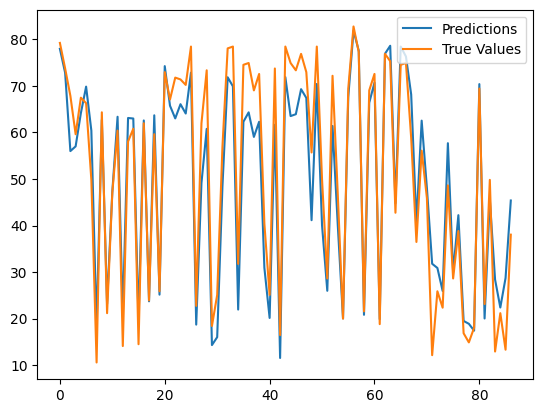

In [8]:
#plots the predicted vs actual values of the top performing model using matplotlib
import matplotlib.pyplot as plt
plt.plot(y_pred, label="Predictions")
plt.plot(test_data[label], label="True Values")
plt.legend()
plt.show()

In [9]:
mse_test = np.mean(((y_pred - test_data[label])**2))
rmse_test = math.sqrt(mse_test)
print("test data rmse", rmse_test)

test data rmse 7.037381798998731
